In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np


check detection limit of XMM where for all fov area all the point sources are complete

In [ ]:
path = '/Users/eusracenorth/Documents/suzaku_A222-223/xmm_data/rui'
hdul = fits.open(f'{path}/snsmap_EP_01000_02000_ML6_trim.fits')
dat = hdul[0].data
hist,bin_edges = np.histogram(dat.flatten(),np.logspace(-16,-13,301))
plt.plot(bin_edges[0:-1], np.cumsum(hist))
plt.xscale('log')
plt.axvline(5e-15)
plt.show()

# check fluxes of rui's results, compared with xmm cat

read xmm cat data

In [ ]:

workpath = '/Users/eusracenorth/Documents/suzaku_A222-223/xissim_test/v1223sgr/xmm_cat'
data = pd.read_csv(f'{workpath}/NXSA-Results-1674083268512.csv')
trans = []
thres = 1e-13
f = (np.array(data["EPIC_XMM_STACK_CAT.EP_5_FLUX"] ) + np.array(data["EPIC_XMM_STACK_CAT.EP_4_FLUX"] ) )
# flux_err = (np.array(data["EPIC_XMM_STACK_CAT.EP_5_FLUX_ERR"] ) **2+ np.array(data["EPIC_XMM_STACK_CAT.EP_4_FLUX_ERR"] ) **2)**0.5
for flux in f:
    if flux<1e-14:
        # trans.append(0.6/0.86) # for index 1
        trans.append(1.158)
    elif (flux>1e-14) & (flux<thres):
        trans.append(1.158) # for index 1.4
    else:
        # trans.append(0.6/1.23) # for index 1.8
        trans.append(1.158)
        # trans.append(0.6)

f = f*np.array(trans)
# fhi = f+flux_err*np.array(trans)
# flo = f-flux_err*np.array(trans)
y, yerr = [],[]
for bin1 in S_center:
    y.append(np.sum(f>bin1))
    yerr.append(np.sqrt(np.sum(f>bin1)))
y = np.array(y)/((16.6**2)*3.14/3600); yerr = np.array(yerr)/((16.6**2)*3.14/3600)
ax.step(S_center, y, color = cblind[1], label = 'XMM-Newton data')
ax.fill_between(S_center, y-yerr, y+yerr, color = cblind[1], step='pre',alpha = 0.3, )

read rui table and convert fits to reg

In [ ]:
# path = '/Users/eusracenorth/Documents/suzaku_A222-223/xmm_data/rui'
# hdul = fits.open(f'{path}/srclist_sum.fits')
# # hdul.info()
# dat= hdul[1].data
# print(dat.columns)



131 3.9266815e-12 1.0447116e-12
36 3.3576909e-12 6.88051e-13
30 3.2419505e-12 6.449013e-13


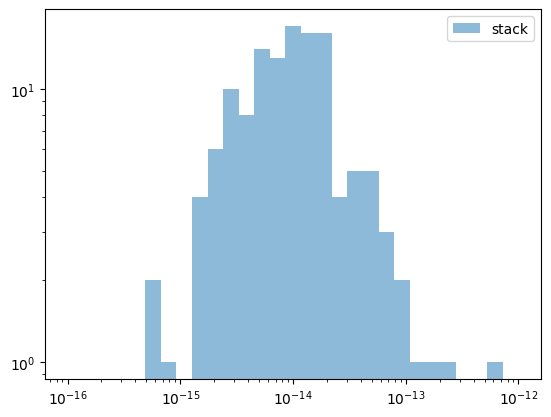

In [16]:
path = '/Users/eusracenorth/Documents/suzaku_A222-223/xmm_data/rui'
hdul = fits.open(f'{path}/srclist_sum_ex_extend_byeye.fits')
data = hdul[1].data
trans = 1/1.2
# obses = ['0502020101', '0502020201']
# for i, obs in enumerate(['0502020101', '0502020201']):
# where_lst = [(data['OBS_ID']=='0502020101'), (data['OBS_ID']=='0502020201'), (data['OBS_ID']!='0502020101') & (data['OBS_ID']!='0502020201')]
# labels = ['101', '201', 'stack']
where_lst = [(data['OBS_ID']!='0502020101') & (data['OBS_ID']!='0502020201')]
ex_radec = [(24.380,-12.990),(24.394,-12.993),(24.482,-12.820),(24.479,-12.796),(24.509,-12.754)]
where1 =np.arange(len(data['OBS_ID']))
idx1 = []
for pos in ex_radec:
    idx1+=list(where1[(abs(data['RA']-pos[0]) < 0.001) & (abs(data['DEC']-pos[1]) < 0.001)])
labels = ['stack']
for i, where in enumerate(where_lst):
    # where[idx1] = False
    flux = (np.array(data["EP_5_FLUX"][where] ) + np.array(data["EP_4_FLUX"][where] ) )* trans
    flux_err = np.sqrt(np.array(data["EP_5_FLUX_ERR"][where] )**2 + np.array(data["EP_4_FLUX_ERR"][where] )**2 )* trans
    f_PN = (np.array(data["PN_5_FLUX"][where] ) + np.array(data["PN_4_FLUX"][where] ) )* trans
    f_MOS1 = (np.array(data["M1_5_FLUX"][where] ) + np.array(data["M1_4_FLUX"][where] ) )*trans
    f_MOS2 = (np.array(data["M2_5_FLUX"][where] ) + np.array(data["M2_4_FLUX"][where] ) )*trans
    f = flux
    plt.hist(f, np.logspace(-16, -12, 30), alpha = 0.5, label = labels[i])
plt.xscale('log')
plt.yscale('log')
plt.legend()
print(len(f), np.sum(f[f>6e-15]), np.sum(flux_err[f>6e-15]))
print(np.sum(f>1.8e-14), np.sum(f[f>1.8e-14]), np.sum(flux_err[f>1.8e-14]))
print(np.sum(f>2e-14), np.sum(f[f>2e-14]), np.sum(flux_err[f>2e-14]))


In [15]:
where = ((data['OBS_ID']!='0502020101') & (data['OBS_ID']!='0502020201'))
savepath = '/Users/eusracenorth/Documents/suzaku_A222-223/suzaku_data/spectras/cxb_robust_test/regions_0406_set1'
file = open(f'{savepath}/rui_srcs_ht2e-14.reg', 'w')
file.write('fk5\n')
ra = data['RA'][where][f>2e-14]
dec = data['DEC'][where][f>2e-14]
for i in range(len(ra)):
    file.write(f'circle({ra[i]},{dec[i]},80\")\n')
file.close()

exclude some extended sources by eye

In [ ]:
import os 
path = '/Users/eusracenorth/Documents/suzaku_A222-223/xmm_data/rui'
os.chdir(path)
os.system(f'cp srclist_sum.fits srclist_sum_ex_extend_byeye.fits ')
exsrc = [(24.51, -12.75), (24.48,-12.82), (24.39,-12.99)]
hdul = fits.open(f'{path}/srclist_sum_ex_extend_byeye.fits', 'update')
dat= hdul[1].data
for src in exsrc:
    dat = dat[~((abs(dat['RA']-src[0])<0.01) & (abs(dat['DEC']-src[1])<0.01)) & (dat['OBS_ID']=='0502020101')]
hdul.flush()


In [ ]:
import os 
path = '/Users/eusracenorth/Documents/suzaku_A222-223/xmm_data/rui'
os.chdir(path)
hdul = fits.open(f'{path}/srclist_sum_ex_extend_byeye.fits', 'update')
dat= hdul[1].data
f = open(f'{path}/rui_srcs.reg', 'w')
f.write('fk5\n')
for i in range(len(dat['RA'])):
    f.write(f'circle({dat["RA"][i]}, {dat["DEC"][i]}, 30")\n')
f.close()



In [ ]:
f = open(f'{path}/rui_srcs.reg')
hdul = fits.open(f'{path}/srclist_sum_ex_extend_byeye.fits', 'update')
dat= hdul[1].data
x_arr, y_arr, r_arr = [],[],[]
lines = f.readlines()
for line in lines:
    x_arr.append(line.split('(')[-1].split(',')[0])
    y_arr.append(line.split('(')[-1].split(',')[1])
    r_arr.append('7.5')
dat['X'] = x_arr
dat['Y'] = y_arr
dat['R'] = r_arr
hdul[1].data = dat
hdul.flush()

manage my pointsrc flux from wavdetect

In [ ]:
points = []
xc,yc = 3984.9634, 4146.6652
r2 = 5664.85124**2 # radius squared
for x,y in zip(RA,DEC):
    if (x-xc)**2 + (y-yc)**2 < r2:
        points.append((x,y))